In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
import os
import shutil

In [2]:
train_dir = 'C:/Users/lenovo/Desktop/Proyectos Machine Learning/Bootcamp/Clasificador de imagenes/data/train'

train_cats = [f for f in os.listdir(train_dir) if 'cat' in f]
train_dogs = [f for f in os.listdir(train_dir) if 'dog' in f]

print(f'Total de imágenes de gatos: {len(train_cats)}')
print(f'Total de imágenes de perros: {len(train_dogs)}')

Total de imágenes de gatos: 12500
Total de imágenes de perros: 2406


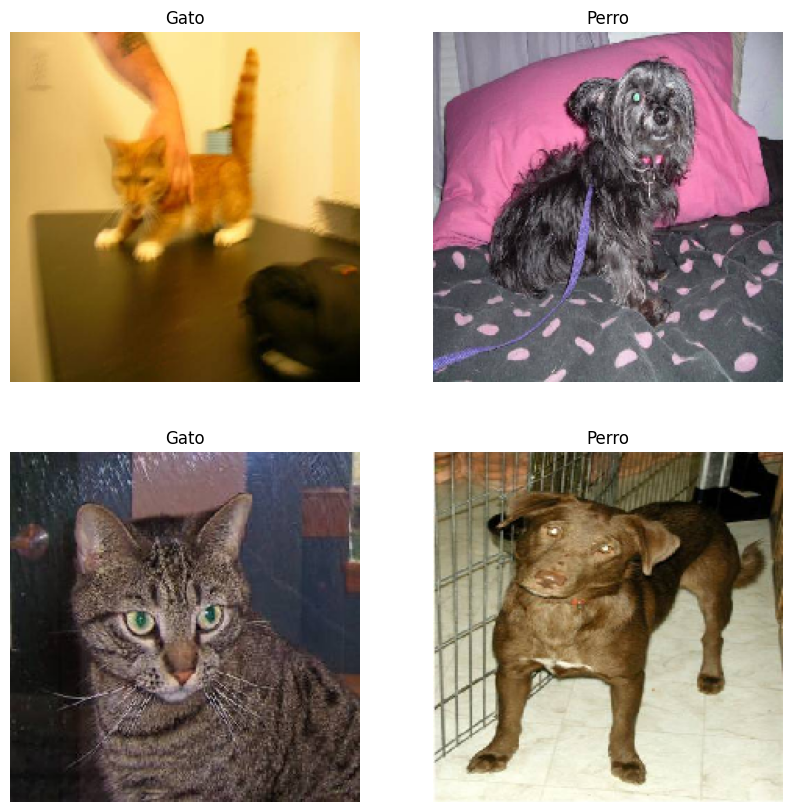

In [6]:

# Definir la ruta al directorio de entrenamiento
train_dir = 'C:/Users/lenovo/Desktop/Proyectos Machine Learning/Bootcamp/Clasificador de imagenes/data/train'

# Listar las imágenes en el directorio principal y separarlas en gatos y perros
all_images = os.listdir(train_dir)
train_cats = [img for img in all_images if 'cat' in img.lower()]
train_dogs = [img for img in all_images if 'dog' in img.lower()]

# Mostrar algunas imágenes de gatos y perros
plt.figure(figsize=(10, 10))

# Asegurarse de que hay suficientes imágenes para mostrar
num_images = min(2, len(train_cats), len(train_dogs))

for i in range(num_images):
    img_path_cat = os.path.join(train_dir, train_cats[i])
    img_path_dog = os.path.join(train_dir, train_dogs[i])
    
    # Mostrar imagen de gato
    img_cat = load_img(img_path_cat, target_size=(224, 224))
    plt.subplot(2, 2, i * 2 + 1)
    plt.imshow(img_cat)
    plt.title('Gato')
    plt.axis('off')
    
    # Mostrar imagen de perro
    img_dog = load_img(img_path_dog, target_size=(224, 224))
    plt.subplot(2, 2, i * 2 + 2)
    plt.imshow(img_dog)
    plt.title('Perro')
    plt.axis('off')

plt.show()


In [7]:
import os
import shutil

# Definir la ruta al directorio de entrenamiento
train_dir = 'C:/Users/lenovo/Desktop/Proyectos Machine Learning/Bootcamp/Clasificador de imagenes/data/train'

# Crear nuevas carpetas para las clases
cat_dir = os.path.join(train_dir, 'cat')
dog_dir = os.path.join(train_dir, 'dog')

os.makedirs(cat_dir, exist_ok=True)
os.makedirs(dog_dir, exist_ok=True)

# Mover las imágenes a las carpetas correspondientes
for filename in os.listdir(train_dir):
    file_path = os.path.join(train_dir, filename)
    if os.path.isfile(file_path):  # Asegurarse de que sea un archivo
        if filename.startswith('cat'):
            shutil.move(file_path, os.path.join(cat_dir, filename))
        elif filename.startswith('dog'):
            shutil.move(file_path, os.path.join(dog_dir, filename))

print("Reorganización completada.")

Reorganización completada.


In [8]:
print(f'Imágenes de gatos: {len(os.listdir(cat_dir))}')
print(f'Imágenes de perros: {len(os.listdir(dog_dir))}')

Imágenes de gatos: 12500
Imágenes de perros: 2406


In [14]:
# Crear un objeto ImageDataGenerator con aumentación de datos
train_datagen = ImageDataGenerator(
    rescale=1./255,             # Normalizar los valores de los píxeles a [0, 1]
    rotation_range=40,          # Rotar las imágenes hasta 40 grados
    width_shift_range=0.2,      # Desplazar las imágenes horizontalmente hasta un 20%
    height_shift_range=0.2,     # Desplazar las imágenes verticalmente hasta un 20%
    shear_range=0.2,            # Aplicar transformaciones de corte
    zoom_range=0.2,             # Aplicar zoom aleatorio
    horizontal_flip=True,       # Voltear las imágenes horizontalmente
    fill_mode='nearest',        # Rellenar píxeles faltantes
    validation_split=0.2        # Usar el 20% de los datos para validación
)

# Definir la ruta al directorio de entrenamiento
train_dir = 'C:/Users/lenovo/Desktop/Proyectos Machine Learning/Bootcamp/Clasificador de imagenes/data/train'

# Crear generador de datos de entrenamiento
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=16,
    class_mode='binary',
    subset='training'
)

# Crear generador de datos de validación
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=16,
    class_mode='binary',
    subset='validation'
)

print("Generadores de datos creados con aumentación.")

Found 11925 images belonging to 2 classes.
Found 2981 images belonging to 2 classes.
Generadores de datos creados con aumentación.


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, MaxPool2D
from tensorflow.keras.optimizers import Adam

# Definir la arquitectura del modelo ajustada para recursos limitados
model = Sequential()

# Primera capa convolucional
model.add(Conv2D(input_shape=(128, 128, 3), filters=16, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Segunda capa convolucional
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Tercera capa convolucional
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Capa de aplanamiento
model.add(Flatten())

# Capa densa con dropout reducido
model.add(Dense(units=128, activation="relu"))
model.add(Dropout(0.3))

# Capa de salida
model.add(Dense(units=1, activation="sigmoid"))

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model.summary()

c:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 128, 128, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     2,097,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,120,993 (8.09 MB)

 Trainable params: 2,120,993 (8.09 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Configurar los callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True)

In [16]:
# Entrenar el modelo
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10  
)

Epoch 1/10


c:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


745/745 ━━━━━━━━━━━━━━━━━━━━ 507s 660ms/step - accuracy: 0.8273 - loss: 0.4799 - val_accuracy: 0.8384 - val_loss: 0.4383
Epoch 2/10
745/745 ━━━━━━━━━━━━━━━━━━━━ 1s 505us/step - accuracy: 0.8750 - loss: 0.4043 - val_accuracy: 1.0000 - val_loss: 0.1075
Epoch 3/10


c:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


745/745 ━━━━━━━━━━━━━━━━━━━━ 173s 231ms/step - accuracy: 0.8394 - loss: 0.4218 - val_accuracy: 0.8387 - val_loss: 0.4051
Epoch 4/10
745/745 ━━━━━━━━━━━━━━━━━━━━ 0s 49us/step - accuracy: 0.8125 - loss: 0.2947 - val_accuracy: 0.8000 - val_loss: 0.3415
Epoch 5/10
745/745 ━━━━━━━━━━━━━━━━━━━━ 174s 233ms/step - accuracy: 0.8454 - loss: 0.3954 - val_accuracy: 0.8407 - val_loss: 0.4188
Epoch 6/10
745/745 ━━━━━━━━━━━━━━━━━━━━ 0s 39us/step - accuracy: 0.9375 - loss: 0.2581 - val_accuracy: 1.0000 - val_loss: 0.0887
Epoch 7/10
745/745 ━━━━━━━━━━━━━━━━━━━━ 175s 234ms/step - accuracy: 0.8447 - loss: 0.3936 - val_accuracy: 0.8485 - val_loss: 0.3797
Epoch 8/10
745/745 ━━━━━━━━━━━━━━━━━━━━ 0s 47us/step - accuracy: 0.6875 - loss: 0.4473 - val_accuracy: 0.6000 - val_loss: 0.6094
Epoch 9/10
745/745 ━━━━━━━━━━━━━━━━━━━━ 178s 238ms/step - accuracy: 0.8520 - loss: 0.3797 - val_accuracy: 0.8508 - val_loss: 0.3756
Epoch 10/10
745/745 ━━━━━━━━━━━━━━━━━━━━ 0s 60us/step - accuracy: 0.5625 - loss: 0.7955 - val_ac

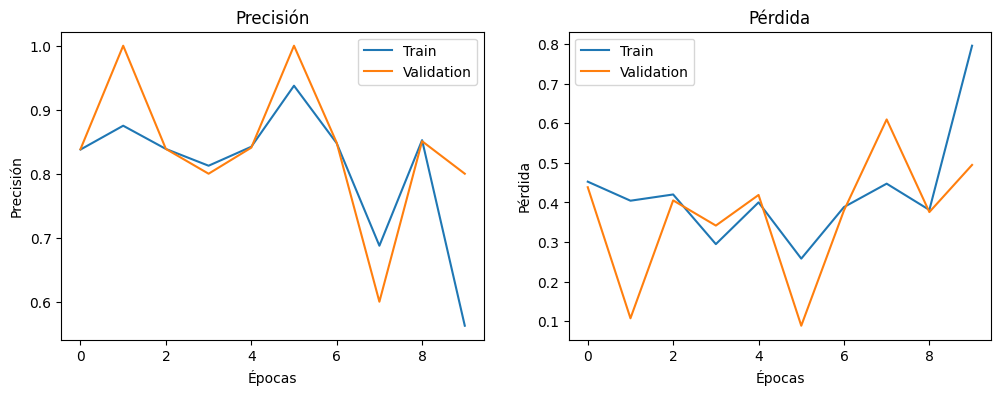

In [17]:
# Graficar precisión y pérdida
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

In [18]:
# Definir la arquitectura del modelo con regularización Dropout
model = Sequential()

model.add(Conv2D(input_shape=(128, 128, 3), filters=16, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))  # Agrega regularización Dropout

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))  # Agrega regularización Dropout

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))  # Agrega regularización Dropout

model.add(Flatten())
model.add(Dense(units=128, activation="relu"))
model.add(Dropout(0.5))  # Agrega regularización Dropout
model.add(Dense(units=1, activation="sigmoid"))

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 128, 128, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 64, 64, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     2,097,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,120,993 (8.09 MB)

 Trainable params: 2,120,993 (8.09 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Entrenar el modelo
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10  
)

Epoch 1/10
745/745 ━━━━━━━━━━━━━━━━━━━━ 192s 253ms/step - accuracy: 0.8303 - loss: 0.4829 - val_accuracy: 0.8394 - val_loss: 0.5478
Epoch 2/10
745/745 ━━━━━━━━━━━━━━━━━━━━ 0s 76us/step - accuracy: 0.9375 - loss: 0.2602 - val_accuracy: 0.4000 - val_loss: 0.7532
Epoch 3/10
745/745 ━━━━━━━━━━━━━━━━━━━━ 186s 249ms/step - accuracy: 0.8410 - loss: 0.4438 - val_accuracy: 0.8387 - val_loss: 0.4774
Epoch 4/10
745/745 ━━━━━━━━━━━━━━━━━━━━ 0s 53us/step - accuracy: 0.8125 - loss: 0.4650 - val_accuracy: 0.8000 - val_loss: 0.5305
Epoch 5/10
745/745 ━━━━━━━━━━━━━━━━━━━━ 189s 253ms/step - accuracy: 0.8410 - loss: 0.4285 - val_accuracy: 0.8384 - val_loss: 0.4266
Epoch 6/10
745/745 ━━━━━━━━━━━━━━━━━━━━ 0s 65us/step - accuracy: 1.0000 - loss: 0.1481 - val_accuracy: 1.0000 - val_loss: 0.1805
Epoch 7/10
745/745 ━━━━━━━━━━━━━━━━━━━━ 194s 259ms/step - accuracy: 0.8356 - loss: 0.4305 - val_accuracy: 0.8387 - val_loss: 0.4269
Epoch 8/10
745/745 ━━━━━━━━━━━━━━━━━━━━ 0s 66us/step - accuracy: 0.9375 - loss: 0.251

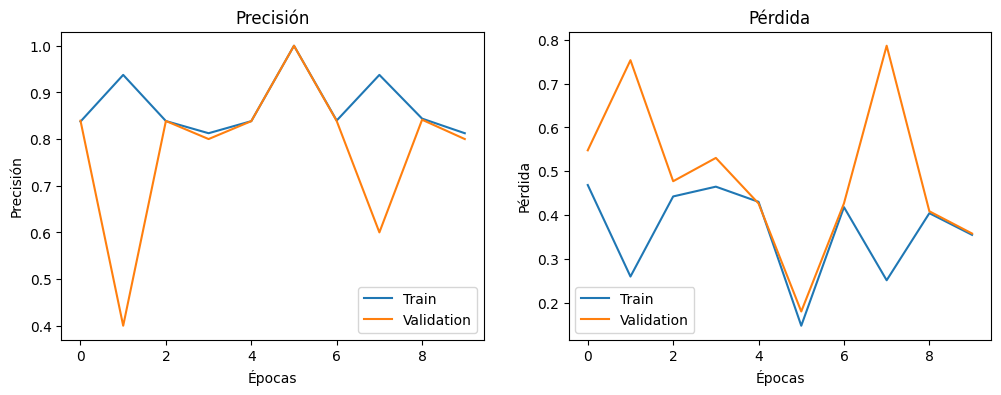

In [20]:
# Graficar precisión y pérdida
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

In [21]:

# Definir la arquitectura del modelo con más capas convolucionales y densas
model = Sequential()

model.add(Conv2D(input_shape=(128, 128, 3), filters=16, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(units=256, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation="sigmoid"))

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 128, 128, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 64, 64, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,227,873 (8.50 MB)

 Trainable params: 2,227,873 (8.50 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# Entrenar el modelo
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10  
)

Epoch 1/10
745/745 ━━━━━━━━━━━━━━━━━━━━ 227s 298ms/step - accuracy: 0.8335 - loss: 0.4803 - val_accuracy: 0.8387 - val_loss: 0.5375
Epoch 2/10
745/745 ━━━━━━━━━━━━━━━━━━━━ 0s 120us/step - accuracy: 0.6875 - loss: 0.6436 - val_accuracy: 0.8000 - val_loss: 0.5464
Epoch 3/10
745/745 ━━━━━━━━━━━━━━━━━━━━ 216s 289ms/step - accuracy: 0.8355 - loss: 0.4556 - val_accuracy: 0.8390 - val_loss: 0.4476
Epoch 4/10
745/745 ━━━━━━━━━━━━━━━━━━━━ 0s 75us/step - accuracy: 0.8750 - loss: 0.4390 - val_accuracy: 0.6000 - val_loss: 0.7183
Epoch 5/10
745/745 ━━━━━━━━━━━━━━━━━━━━ 192s 257ms/step - accuracy: 0.8333 - loss: 0.4391 - val_accuracy: 0.8394 - val_loss: 0.4213
Epoch 6/10
745/745 ━━━━━━━━━━━━━━━━━━━━ 0s 46us/step - accuracy: 0.8125 - loss: 0.5135 - val_accuracy: 0.4000 - val_loss: 1.2173
Epoch 7/10
745/745 ━━━━━━━━━━━━━━━━━━━━ 238s 318ms/step - accuracy: 0.8385 - loss: 0.4205 - val_accuracy: 0.8390 - val_loss: 0.4207
Epoch 8/10
745/745 ━━━━━━━━━━━━━━━━━━━━ 0s 88us/step - accuracy: 0.6250 - loss: 0.75

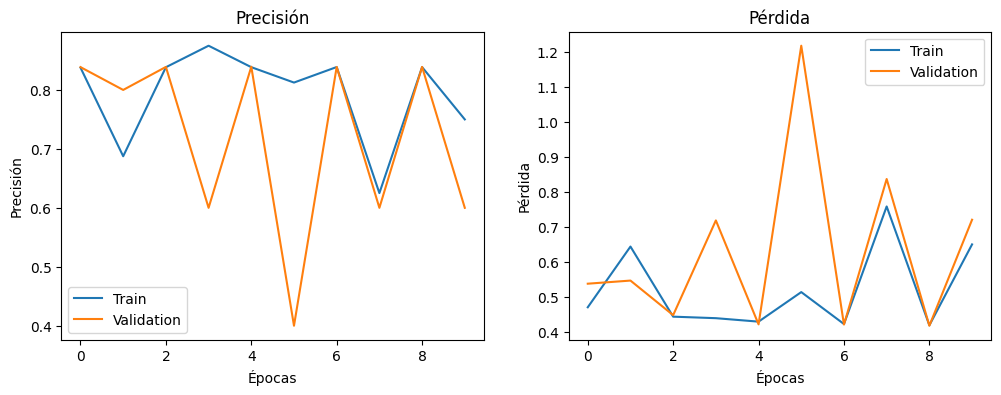

In [23]:
# Graficar precisión y pérdida
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

In [24]:
# Definir el modelo
model = Sequential()

model.add(Conv2D(input_shape=(128, 128, 3), filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())
model.add(Dense(units=4096, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=4096, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation="sigmoid"))  # Cambiamos la salida a una sola unidad para clasificación binaria

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
# Entrenar el modelo
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10
)

Epoch 1/10
745/745 ━━━━━━━━━━━━━━━━━━━━ 7164s 10s/step - accuracy: 0.8333 - loss: 0.4693 - val_accuracy: 0.8387 - val_loss: 0.4612
Epoch 2/10
745/745 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8750 - loss: 0.4178 - val_accuracy: 0.8000 - val_loss: 0.5055
Epoch 3/10
745/745 ━━━━━━━━━━━━━━━━━━━━ 6832s 9s/step - accuracy: 0.8332 - loss: 0.4543 - val_accuracy: 0.8384 - val_loss: 0.4423
Epoch 4/10
745/745 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8125 - loss: 0.4857 - val_accuracy: 1.0000 - val_loss: 0.1764
Epoch 5/10
745/745 ━━━━━━━━━━━━━━━━━━━━ 6688s 9s/step - accuracy: 0.8417 - loss: 0.4401 - val_accuracy: 0.8384 - val_loss: 0.4456
Epoch 6/10
745/745 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.8125 - loss: 0.4967 - val_accuracy: 1.0000 - val_loss: 0.1372
Epoch 7/10
745/745 ━━━━━━━━━━━━━━━━━━━━ 6632s 9s/step - accuracy: 0.8336 - loss: 0.4543 - val_accuracy: 0.8384 - val_loss: 0.4424
Epoch 8/10
745/745 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.7500 - loss: 0.5916 - val_

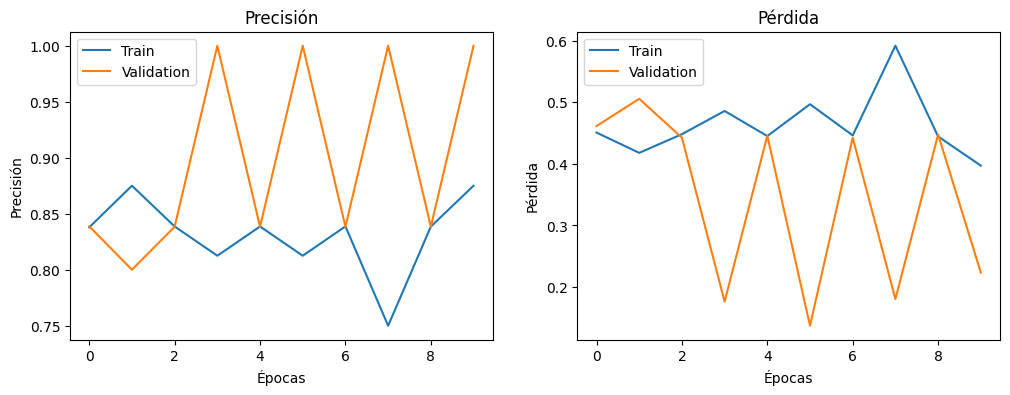

In [26]:
# Graficar precisión y pérdida
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

In [27]:
# Guardar el modelo entrenado
model.save('modelo_entrenado.h5')
print("Modelo guardado como modelo_entrenado.h5")

Modelo guardado como modelo_entrenado.h5
